# Speech Recognition 

And because even the human ear doesn't process raw wave forms, but the human ear has physical structures that measures the amounts of intensity of different frequencies, `there is, a common pre-processing step for audio data is to run your raw audio clip and generate a spectrogram`. <br>
So, this is the plots where the horizontal axis is time, and the vertical axis is frequencies, and intensity of different colors shows the amount of energy.

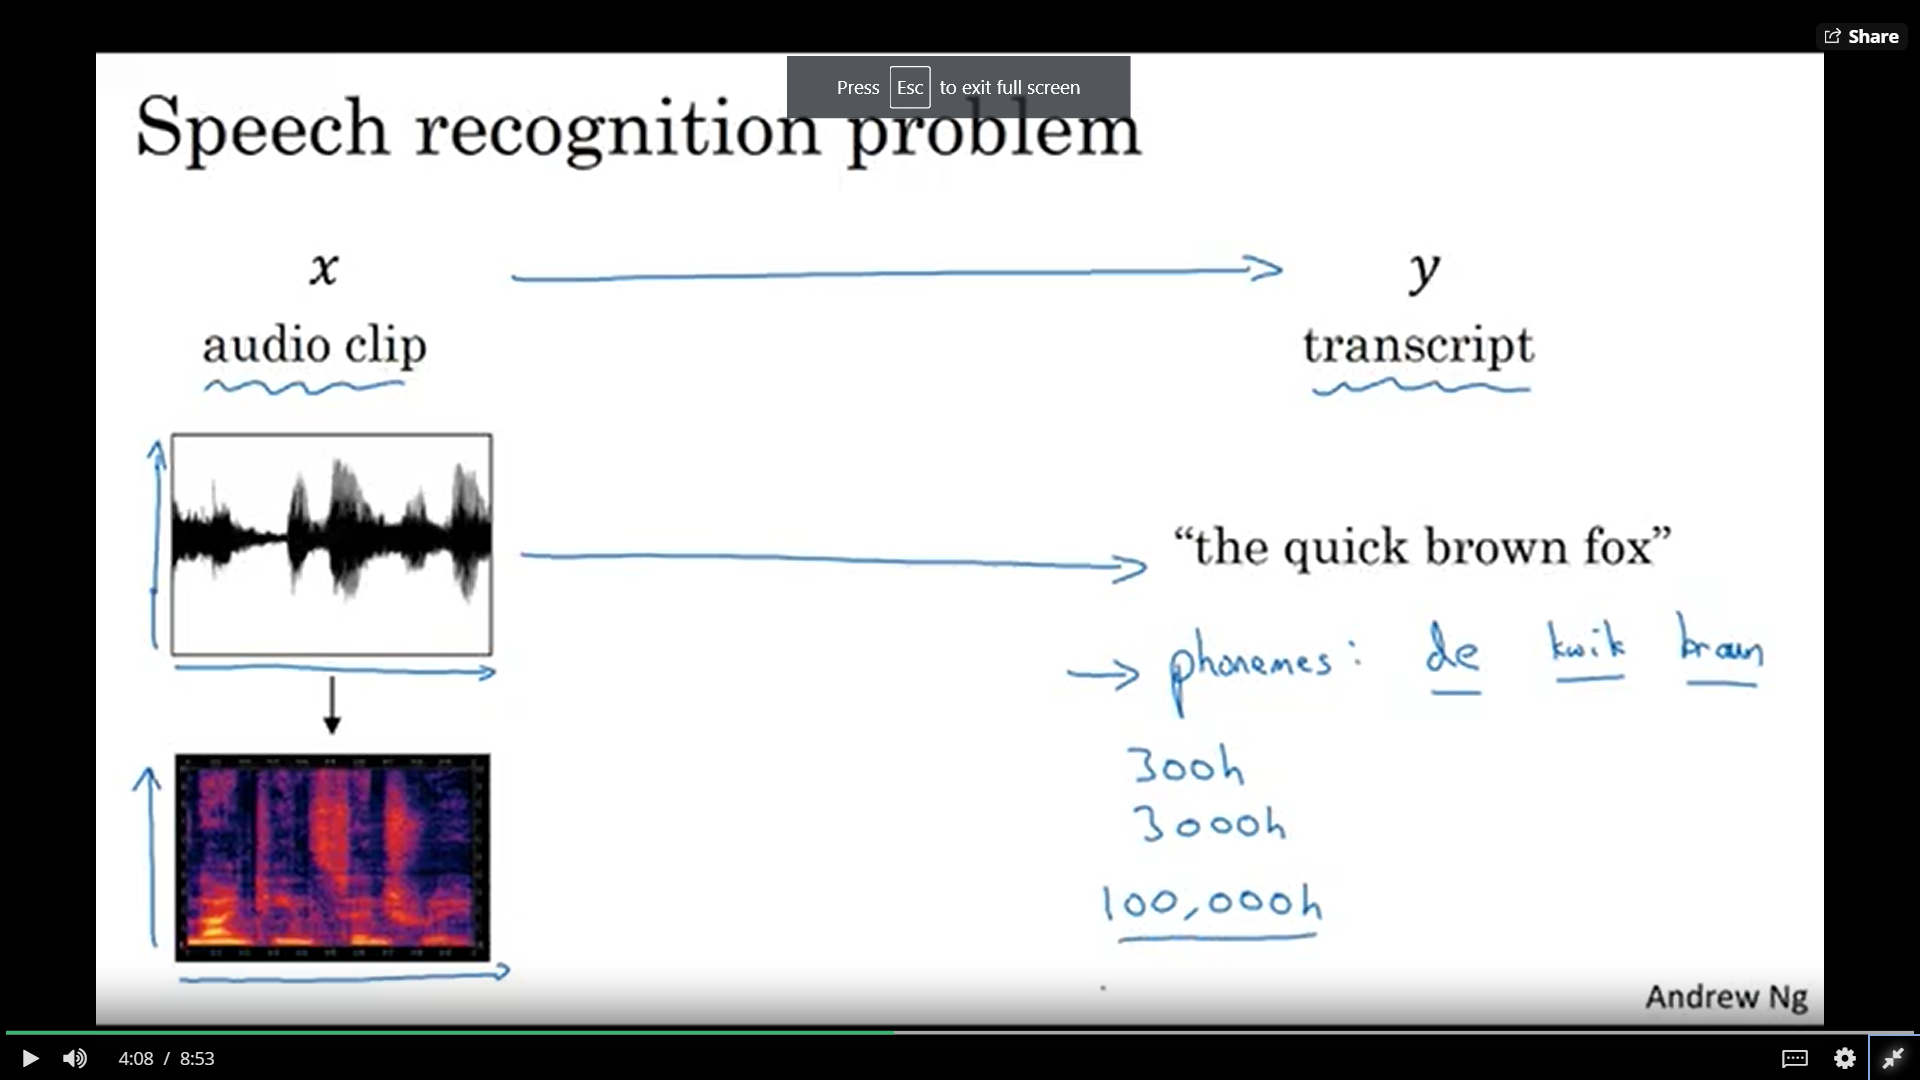

So, one of the most exciting trends in speech recognition is that, once upon a time, speech recognition systems used to be built using phonemes and this where, I want to say hand-engineered basic units of cells. So, the quick brown fox represented as phonemes. <br>
I'm going to simplify a bit, let say, "The" has a "de" and "e" sound and Quick, has a "ku" and "wu", "ik", "k" sound, and linguist used to write off these basic units of sound, and try the Greek language down to these basic units of sound. So, brown, this aren't the official phonemes which are written with more complicated notation, but linguists use to hypothesize that writing down audio in terms of these basic units of sound called phonemes would be the best way to do speech recognition. 

But with end-to-end deep learning, we're finding that phonemes representations are no longer necessary. But instead, you can built systems that input an audio clip and directly output a transcript without needing to use hand-engineered representations like these. 

###### So, how do you build a speech recognition system?

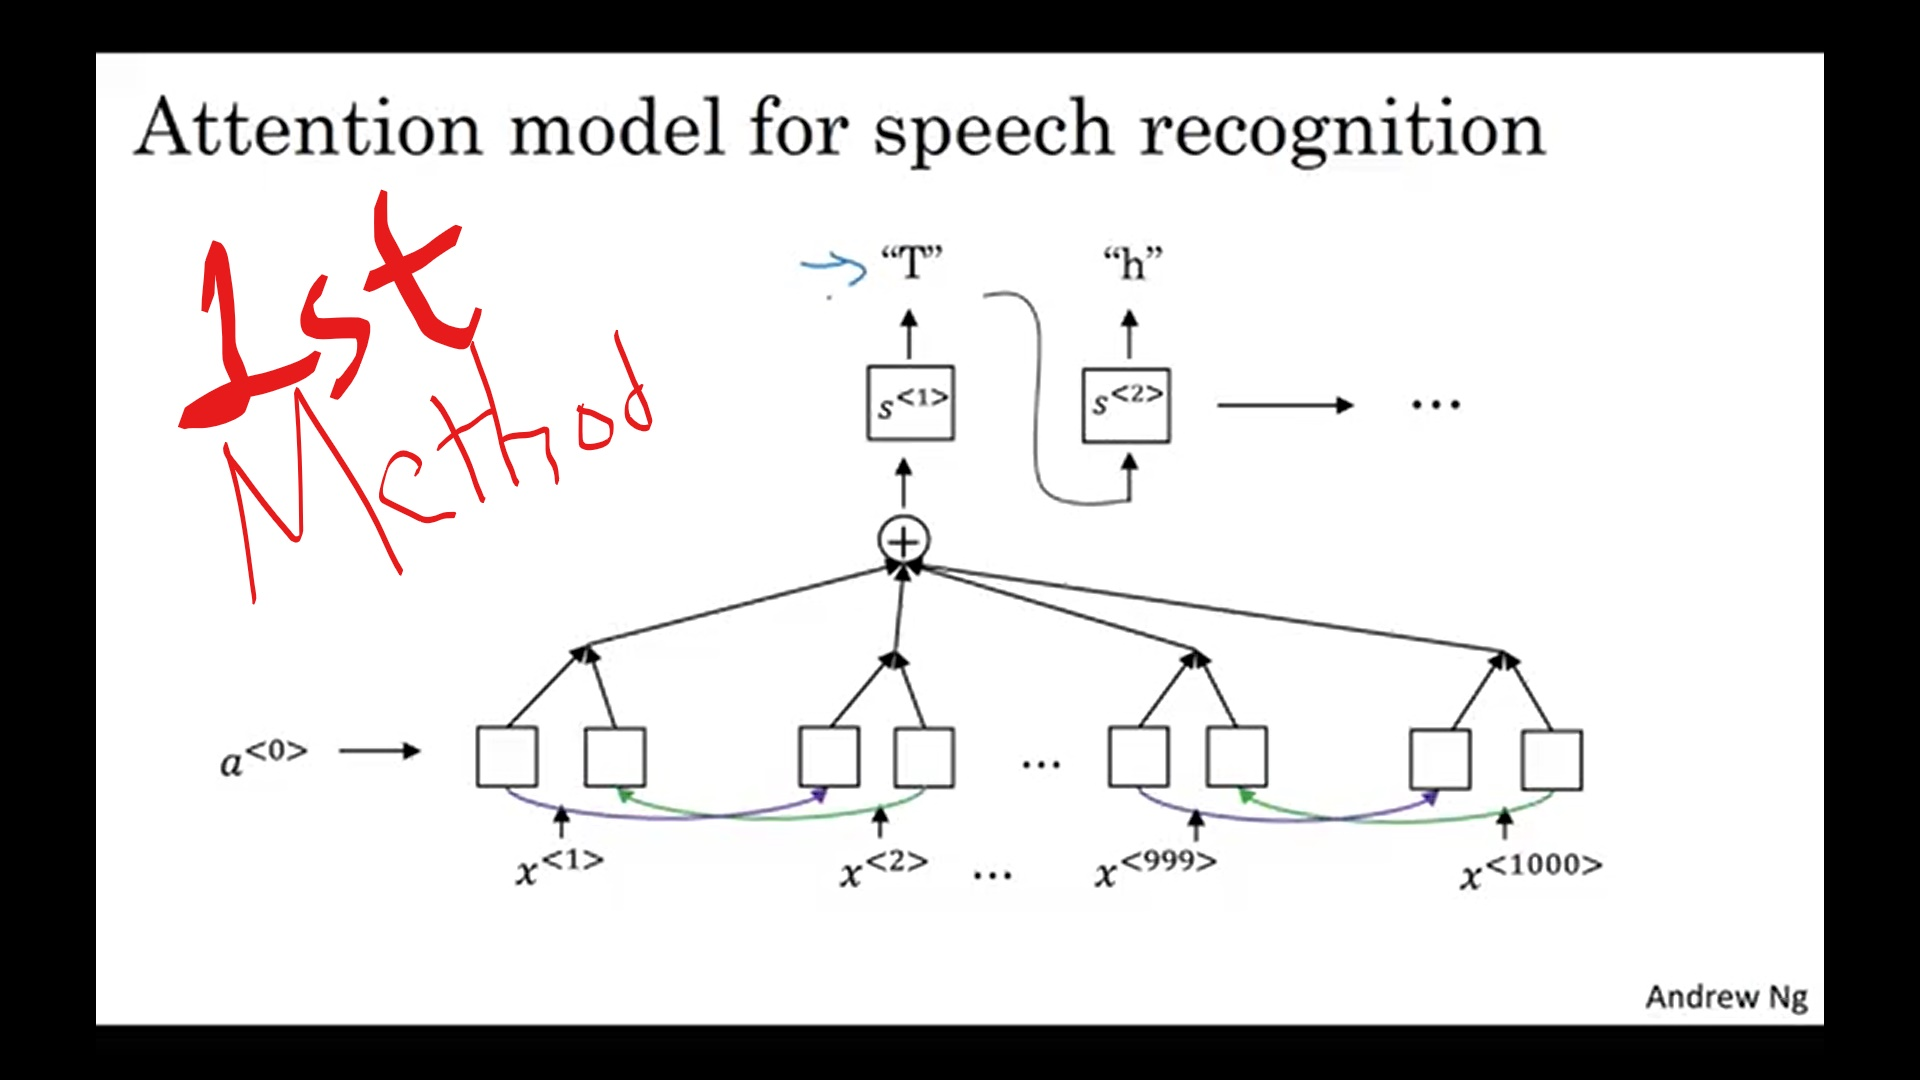

*  In the last video, we're talking about the attention model. So, one thing you could do is actually do that, where on the horizontal axis, you take in different time frames of the audio input, and then you have an attention model try to output the transcript like, "the quick brown fox", or what it was said.
* One other method that seems to work well is to use the CTC cost for speech recognition. CTC stands for Connection is Temporal Classification and is due to Alex Graves, Santiago Fernandes, Faustino Gomez, and Jürgen Schmidhuber. 

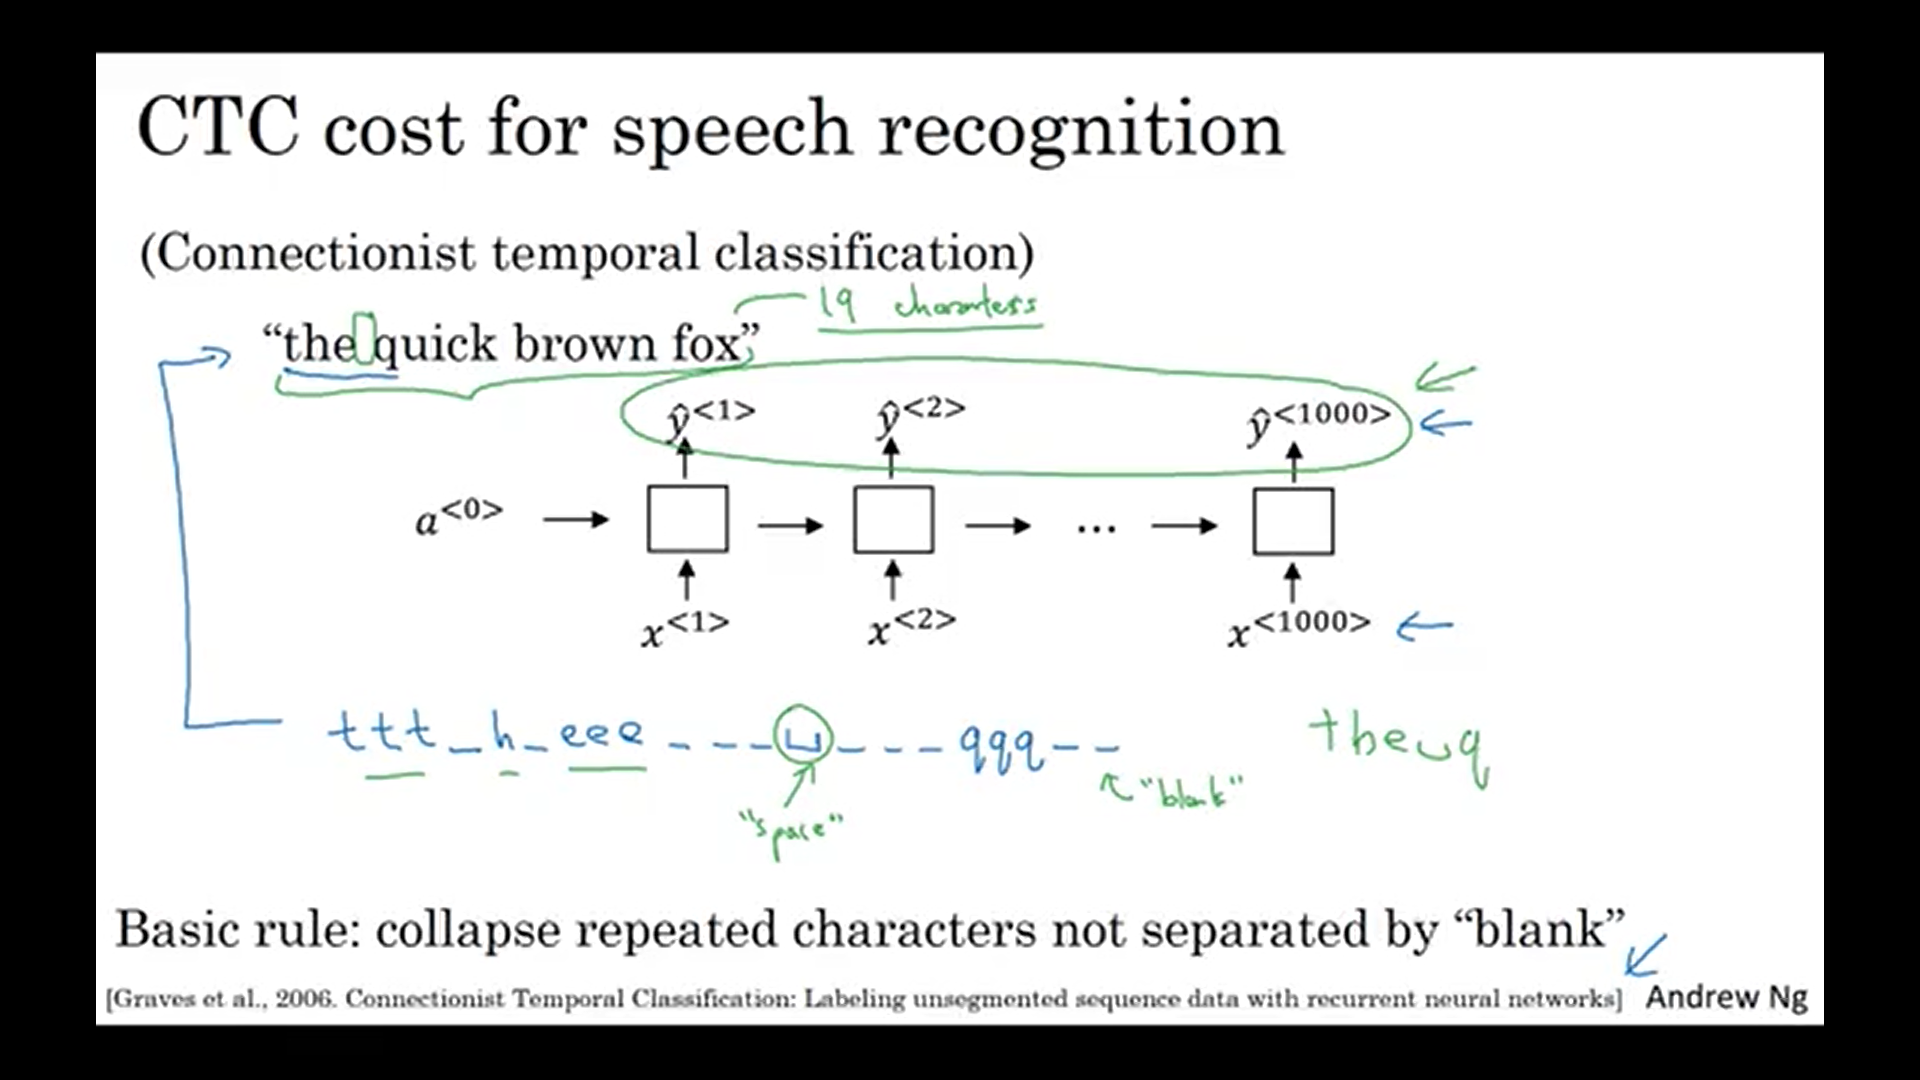

But notice that the number of time steps here is very large and in speech recognition, usually the number of input time steps is much bigger than the number of output time steps. <br>
So, for example, if you have 10 seconds of audio and your features come at a 100 hertz so 100 samples per second, then a 10 second audio clip would end up with a thousand inputs. Right, so it's 100 hertz times 10 seconds, and so with a thousand inputs.<br>
But your output might not have a thousand alphabets, might not have a thousand characters. So, what do you do? The CTC cost function allows the RNN to generate an output like this ttt, there's a special character called the blank character, which we're going to write as an underscore here, h_eee___, and then maybe a space, we're going to write like this, so that a space and then ___ qqq__.<br>
    And, this is considered a correct output for the first parts of the space, quick with the Q, and the basic rule for the CTC cost function is to collapse repeated characters not separated by "blank".

# Trigger Word Detection

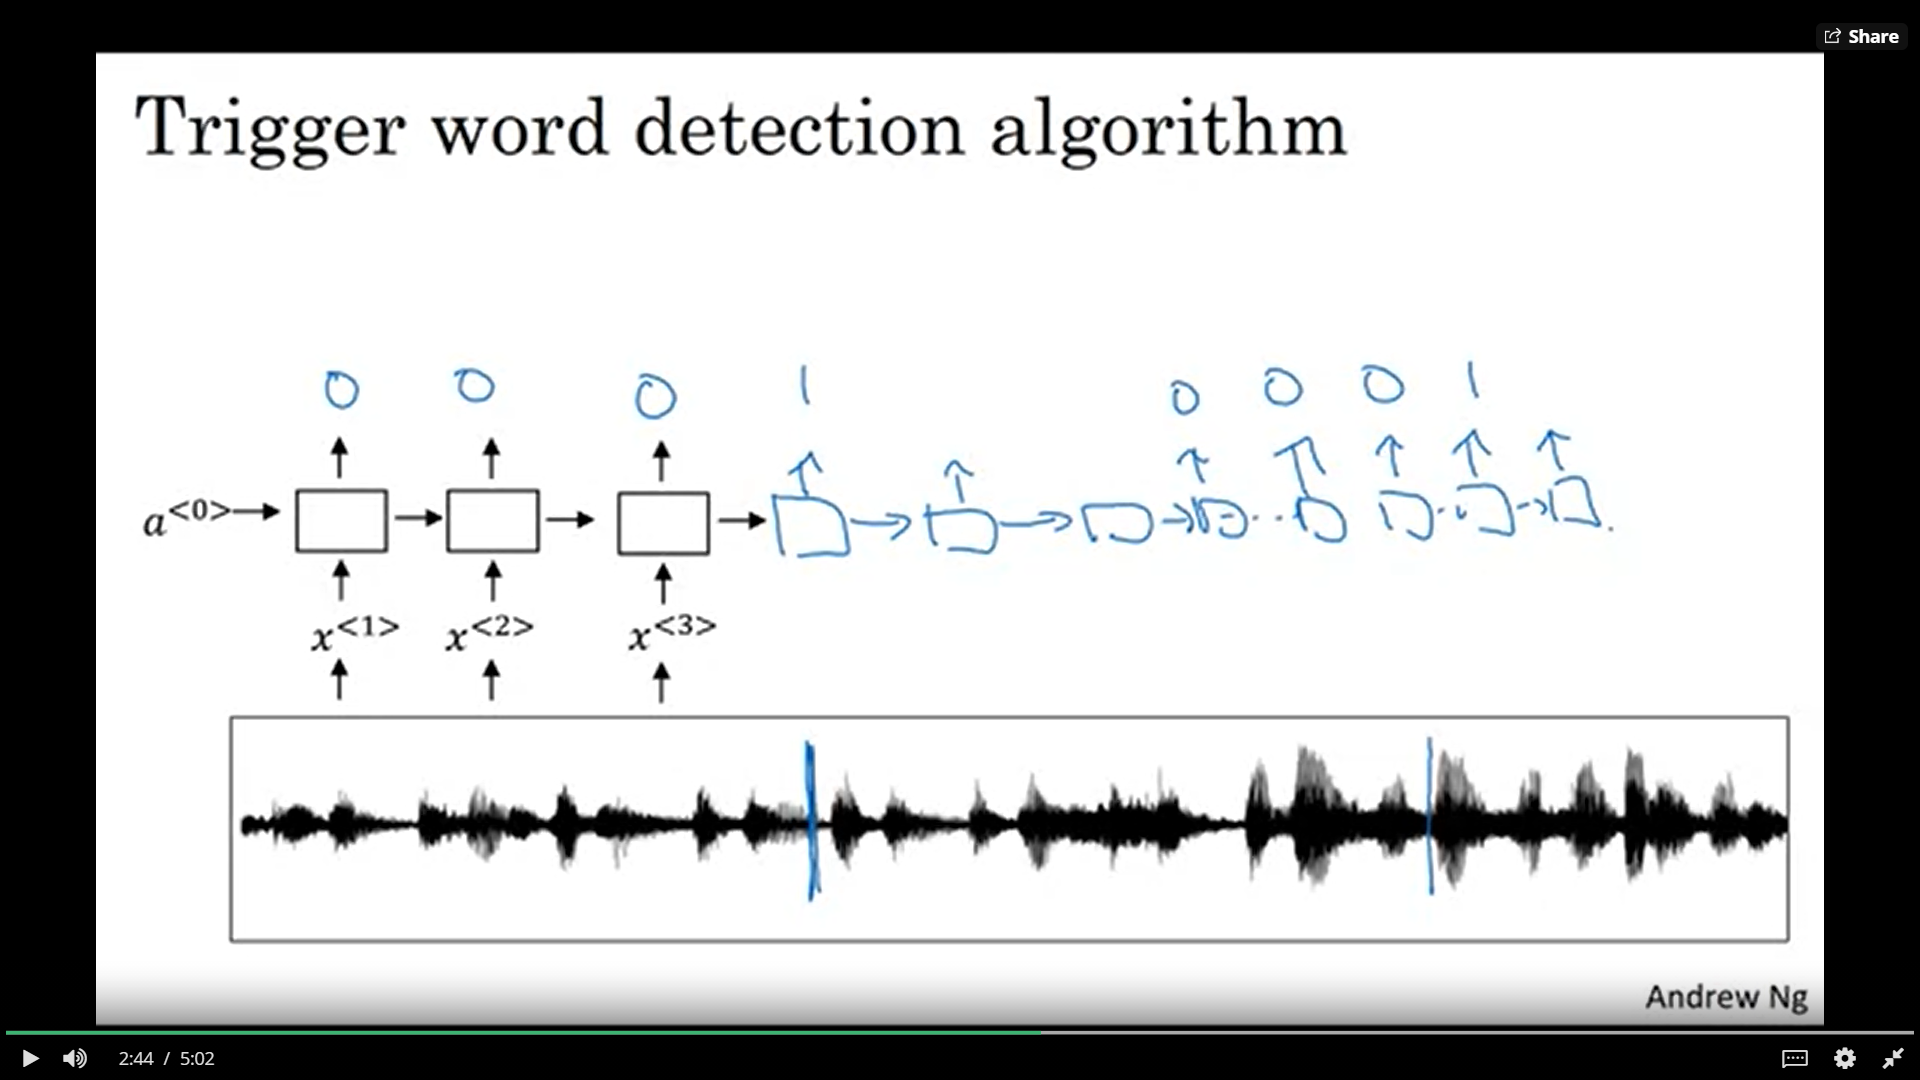

Then, in the training set, you can set the target labels to be zero for everything before that point, and right after that, to set the target label of one.<br>
Then, if a little bit later on, the trigger word was said again at this point, then you can again set the target label to be one, right after that. Now, this type of labeling scheme for an RNN could work.<br> Actually it just won't actually work reasonably well. One slight disadvantage of this is, it creates a very imbalanced training set, so we have a lot more zeros than we want

So, one other thing you could do, that it's little bit of a hack, but could make the model a little bit easier to train, is instead of setting only a single time step to operate one, you could actually make it to operate a few ones for several times.<br>
So, for a fixed period of time, before reverting back to zero. So that slightly evens out the ratio of one's to zero's, but there's this little bit of a hack. But, if this is when in the audio clip, the trigger word was said, then right after that, you can set the target label to one, and if this is the trigger word said again, then right after that, is when you want the RNN to output one.

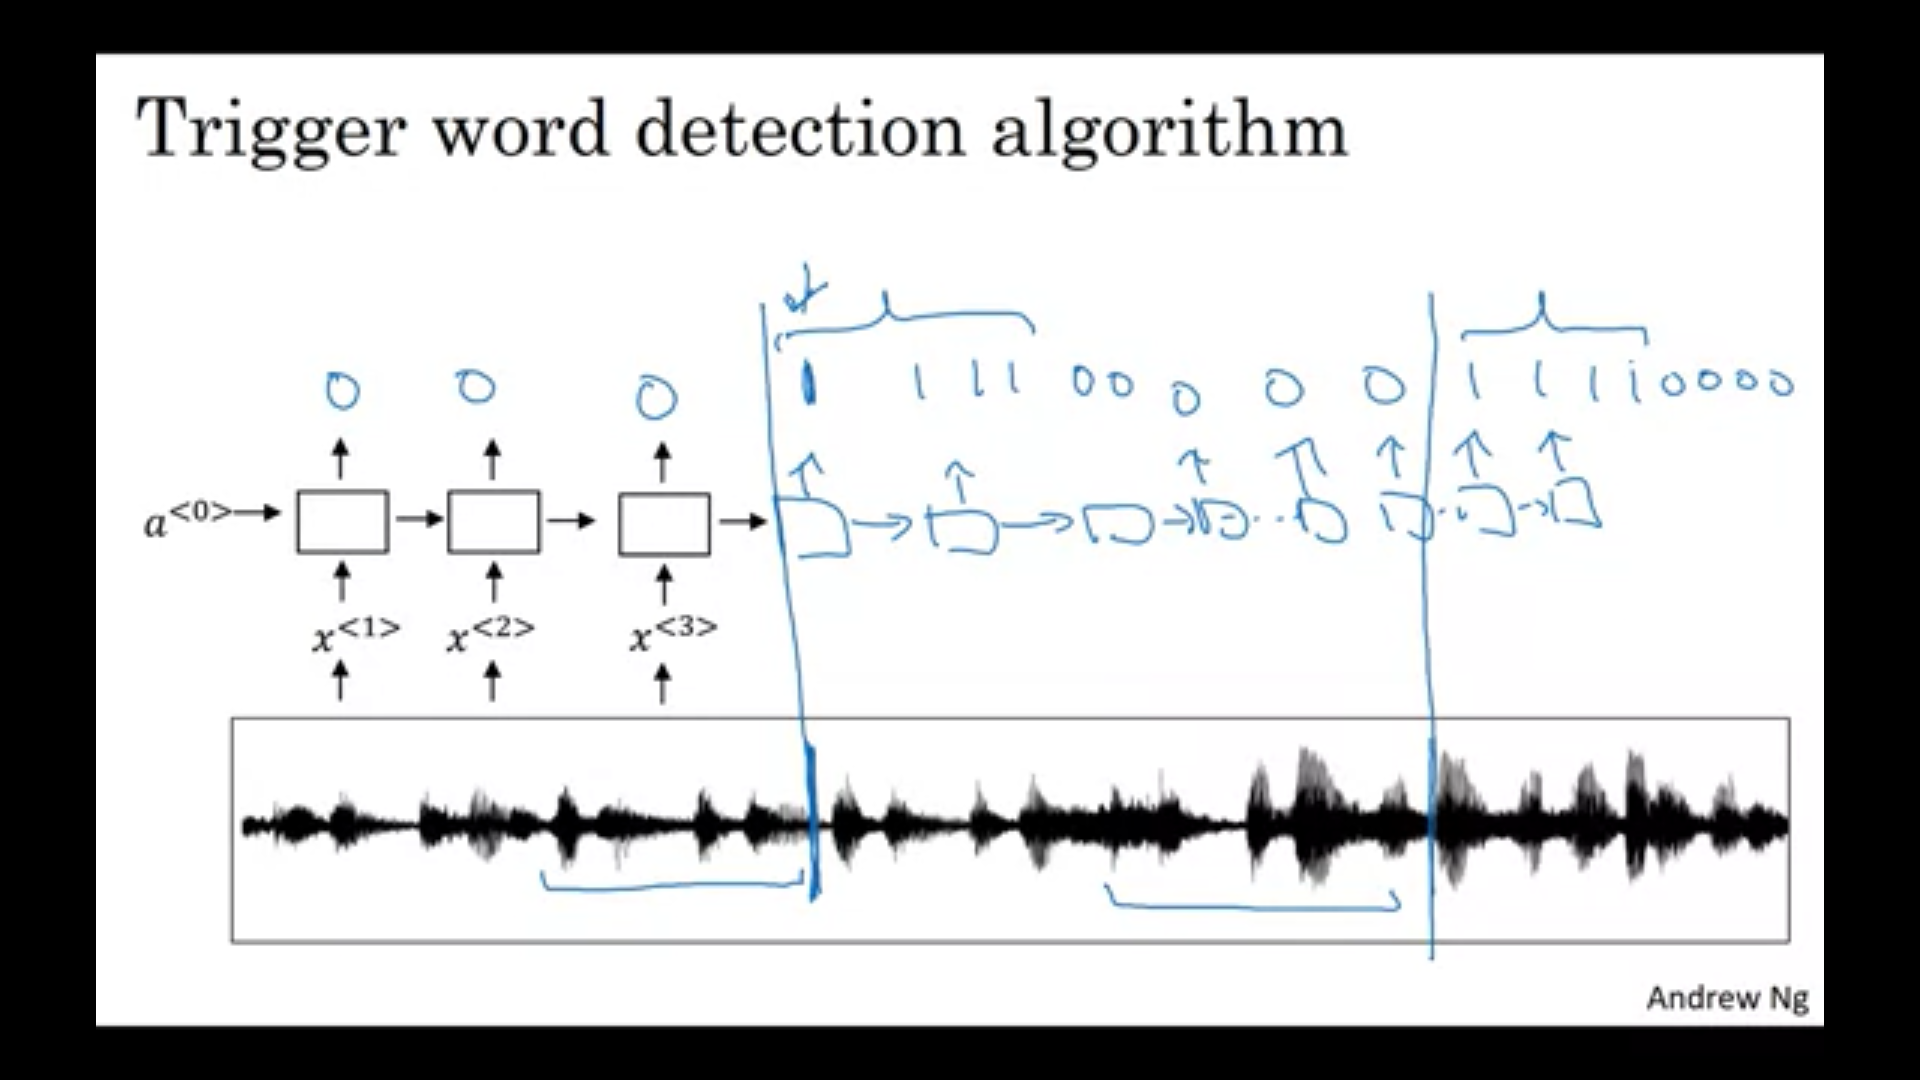